<a href="https://colab.research.google.com/github/a-njan-a/Twitter-rumor-detection-and-analysis/blob/main/Scraped_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-757c2qci
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-757c2qci
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 3dd9c28e31b8babeb2a187fbae994d9717ded168
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev3+g3dd9c28-py3-none-any.whl size=72466 sha256=d811ff5b870342584964dd847632f6bd52268e0a1e0c9cf934d4a37f82314bd9
  Stored in directory: /tmp/pip-ephem-wheel-cache-b5rxrfas/wheels/1a/ba/e2/39fa3a11802c4a622f2efc8be3f5ff854481051d0b4c95c1fd
Successfully built snscrape


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('covid-19 since:2020-04-05 until:2021-07-06').get_items()):
    if i>10000:
        break
    attributes_container.append([tweet.id, tweet.date,tweet.user.displayname, tweet.content, tweet.user.location, tweet.retweetCount, tweet.retweetedTweet])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["id", "Date","User","Tweet","User location","Retweet", "original-tweet-id"])


<ipython-input-30-91dad275e33e>:11: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.id, tweet.date,tweet.user.displayname, tweet.content, tweet.user.location, tweet.retweetCount, tweet.retweetedTweet])


In [ ]:
#tweets_df.to_csv('/content/drive/MyDrive/VIT/project/sin/tweets_data.csv', columns=["User","Tweet"])

In [ ]:
tweets_df.head(10)

,id,Date,User,Tweet,User location,Retweet,original-tweet-id
0,1412199607078031368,2021-07-05 23:59:58+00:00,David Nanulaitta,Apa perlu kita menggunakan time travel ke masa...,Jakarta,0,None
1,1412199596969844737,2021-07-05 23:59:55+00:00,🤎⚜️DarkAveryMariah⚜️🤎,@Camiloesta @UnitedW22607736 @DonaldJTrumpJr I...,"Louisiana, USA",0,None
2,1412199583619305473,2021-07-05 23:59:52+00:00,💚🌏 Sally Heukers 🌞,#Agedcare carers need to be prioritised becaus...,Australia,0,None
3,1412199576648523776,2021-07-05 23:59:51+00:00,Scripps National News,"Over the past week, new COVID-19 cases are up ...",,0,None
4,1412199572454129668,2021-07-05 23:59:50+00:00,PortaldoAmazonas.com,David Almeida anuncia vacinação contra a Covid...,"Manaus, Amazonas",0,None
5,1412199565659410435,2021-07-05 23:59:48+00:00,oscar muñoz,🚨COVID19 en Santa Cruz. El Ministerio de Salud...,Argentina,0,None
6,1412199562740109322,2021-07-05 23:59:47+00:00,MaryElizabeth Rumsey,@KyrieMeMo\nAs of late\nVermont has a 66% vacc...,Texas and New Orleans Native,1,None
7,1412199560194166787,2021-07-05 23:59:47+00:00,RBClouston,🇨🇦Newfoundland (NL) has 1 new case Covid-19 + ...,"Ontario, Canada",0,None
8,1412199553265278978,2021-07-05 23:59:45+00:00,Kristin has left!,If you can #GetVaccinated and haven’t or won’t...,Greenland,12,None
9,1412199540237684744,2021-07-05 23:59:42+00:00,DanielAlvarezCompliance,El Estado mantiene indemne a toda la cadena re...,,1,None


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
additional  = ['rt','rts','retweet'] #we'll store additional stopwords here
swords = set().union(stopwords.words('english'),additional)
swords = set().union(stopwords.words('french'),additional) 
swords = set().union(stopwords.words('spanish'),additional)#big list containing all

In [ ]:
tweets_df.drop_duplicates(subset='Tweet',inplace=True)

In [ ]:
tweets_df['processed_text'] = tweets_df['Tweet'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

<ipython-input-8-d1688ce91b6d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['processed_text'] = tweets_df['Tweet'].str.lower()\


In [ ]:
tweets_df['processed_text'].head(n=10)


0    [apa, perlu, kita, menggunakan, time, travel, ...
1    [if, we, had, and, there, wouldn, t, been, ove...
2    [agedcare, carers, need, to, be, prioritised, ...
3    [over, the, past, week, new, covid, 19, cases,...
4    [david, almeida, anuncia, vacina, covid, 19, p...
5    [covid19, santa, cruz, ministerio, salud, info...
6    [as, of, late, vermont, 66, vaccination, rate,...
7    [newfoundland, nl, 1, new, case, covid, 19, 12...
8    [if, you, can, getvaccinated, and, haven, t, o...
9    [mantiene, indemne, toda, cadena, relacionada,...
Name: processed_text, dtype: object

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
tweets_df['stemmed'] = tweets_df['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])


In [ ]:
tweets_df['stemmed'].head(n=10)


0    [apa, perlu, kita, menggunakan, time, travel, ...
1    [if, we, had, and, there, wouldn, t, been, ove...
2    [agedcar, carer, need, to, be, prioritis, beca...
3    [over, the, past, week, new, covid, 19, case, ...
4    [david, almeida, anuncia, vacina, covid, 19, p...
5    [covid19, santa, cruz, ministerio, salud, info...
6    [as, of, late, vermont, 66, vaccin, rate, the,...
7    [newfoundland, nl, 1, new, case, covid, 19, 12...
8    [if, you, can, getvaccin, and, haven, t, or, w...
9    [mantien, indemn, toda, cadena, relacionada, p...
Name: stemmed, dtype: object

In [ ]:
#Geolocate tweets
locs = tweets_df['User location'].value_counts()
locs.drop('',inplace=True)
locs = locs[locs>=10]
locs

Los Angeles, CA         105
México                   97
Brasil                   88
Venezuela                84
Caracas, Venezuela       74
                       ... 
Miami, FL                10
Chicago, IL              10
Perú                     10
San José, Costa Rica     10
España                   10
Name: User location, Length: 90, dtype: int64

In [ ]:
locs

Los Angeles, CA         105
México                   97
Brasil                   88
Venezuela                84
Caracas, Venezuela       74
                       ... 
Miami, FL                10
Chicago, IL              10
Perú                     10
San José, Costa Rica     10
España                   10
Name: User location, Length: 90, dtype: int64

In [ ]:
locs = list(locs.index)


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='twitter-analysis-cl')

In [ ]:
geolocated = list(map(lambda x: [x,geolocator.geocode(x)[1] if geolocator.geocode(x) else None],locs))
geolocated = pd.DataFrame(geolocated)
geolocated.columns = ['locat','latlong']
geolocated.dropna(subset = ['latlong'], inplace = True)
geolocated

,locat,latlong
0,"Los Angeles, CA","(34.0536909, -118.242766)"
1,México,"(23.6585116, -102.0077097)"
2,Brasil,"(-10.3333333, -53.2)"
3,Venezuela,"(8.0018709, -66.1109318)"
4,"Caracas, Venezuela","(10.5060934, -66.9146008)"
...,...,...
85,"Miami, FL","(25.7741728, -80.19362)"
86,"Chicago, IL","(41.8755616, -87.6244212)"
87,Perú,"(-6.8699697, -75.0458515)"
88,"San José, Costa Rica","(9.9325427, -84.0795782)"


In [ ]:
geolocated['lat'] = geolocated.latlong.apply(lambda x: x[0])
geolocated['lon'] = geolocated.latlong.apply(lambda x: x[1])
geolocated.drop('latlong',axis=1, inplace=True)

In [ ]:
mapdata = pd.merge(tweets_df,geolocated, how='inner', left_on='User location', right_on='locat')


In [ ]:
locations = mapdata.groupby(by=['locat','lat','lon'])\
       .count()['Date']\
       .sort_values(ascending=False)

In [ ]:
locations

locat                 lat         lon        
Los Angeles, CA        34.053691  -118.242766    105
México                 23.658512  -102.007710     97
Brasil                -10.333333  -53.200000      88
Venezuela              8.001871   -66.110932      84
Caracas, Venezuela     10.506093  -66.914601      74
                                                ... 
San José, Costa Rica   9.932543   -84.079578      10
Perú                  -6.869970   -75.045851      10
Chicago, IL            41.875562  -87.624421      10
Miami, FL              25.774173  -80.193620      10
España                 39.326068  -4.837979       10
Name: Date, Length: 90, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
!pip install Cartopy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 42.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 3.8 MB/s eta 0:00:00
  Created wheel for Cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113619 sha256=2bebd48a854c39ab40712aa71b4d6bc80c587df256f2c05925e0659475e57b7c
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built Cartopy


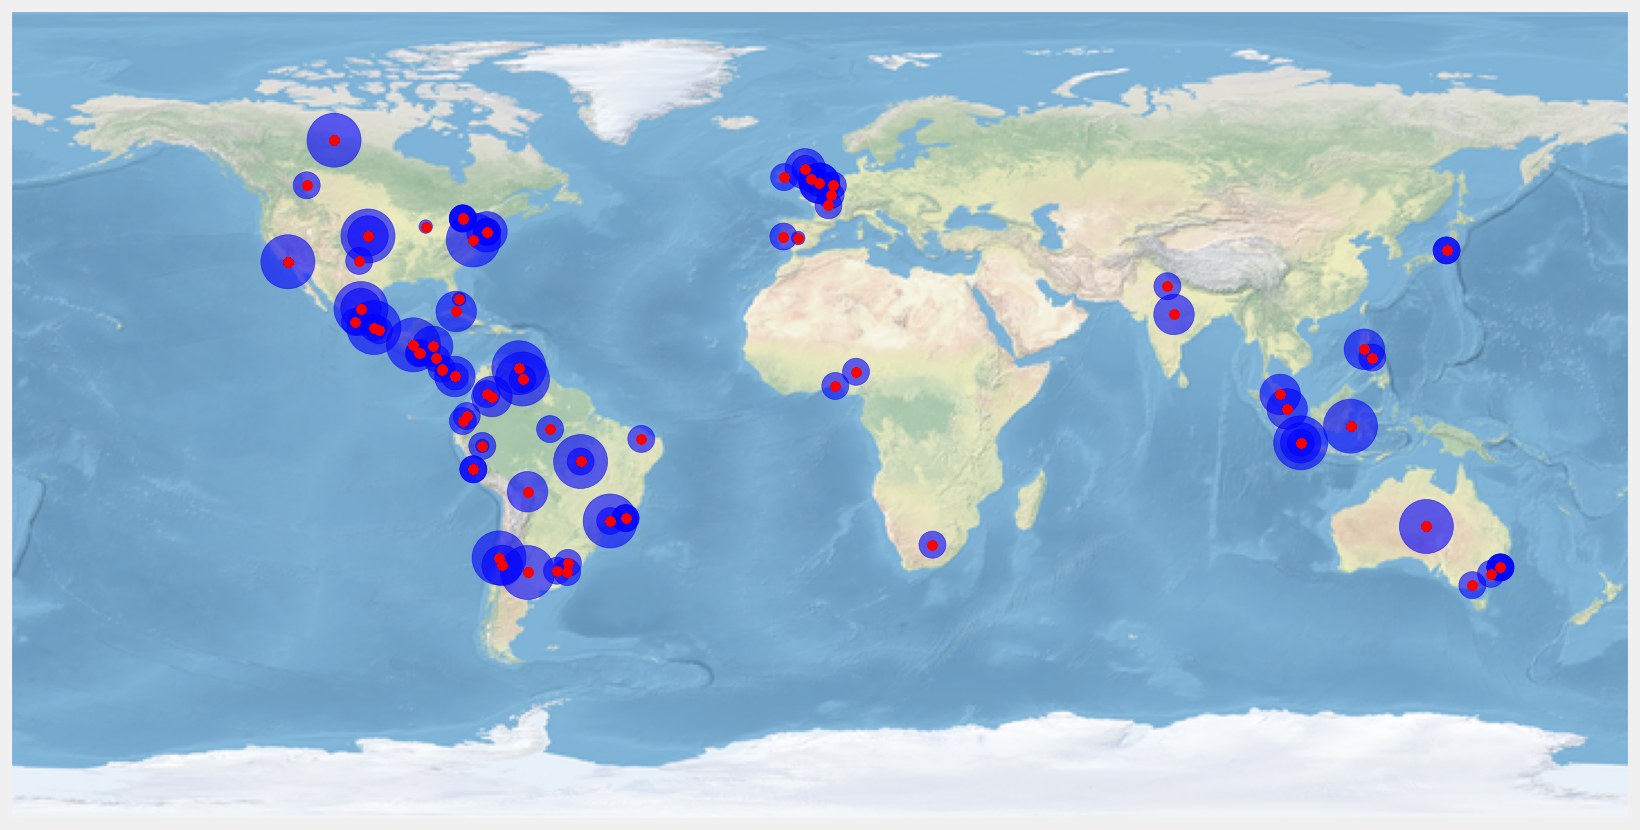

In [ ]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# plot individual locations                                                                                                       
ax.plot(mapdata.lon, mapdata.lat, 'ro', transform=ccrs.PlateCarree())

def get_radius(freq):
    if freq <= 10:
        return 1.5
    elif freq < 20:
        return 3.0
    elif freq < 35:
        return 4.5
    else:
        return 6.0

# plot count of tweets per location
for i,x in locations.iteritems():
    ax.add_patch(Circle(xy=[i[2], i[1]], radius=get_radius(x), color='blue', alpha=0.6, transform=ccrs.PlateCarree()))
plt.show()



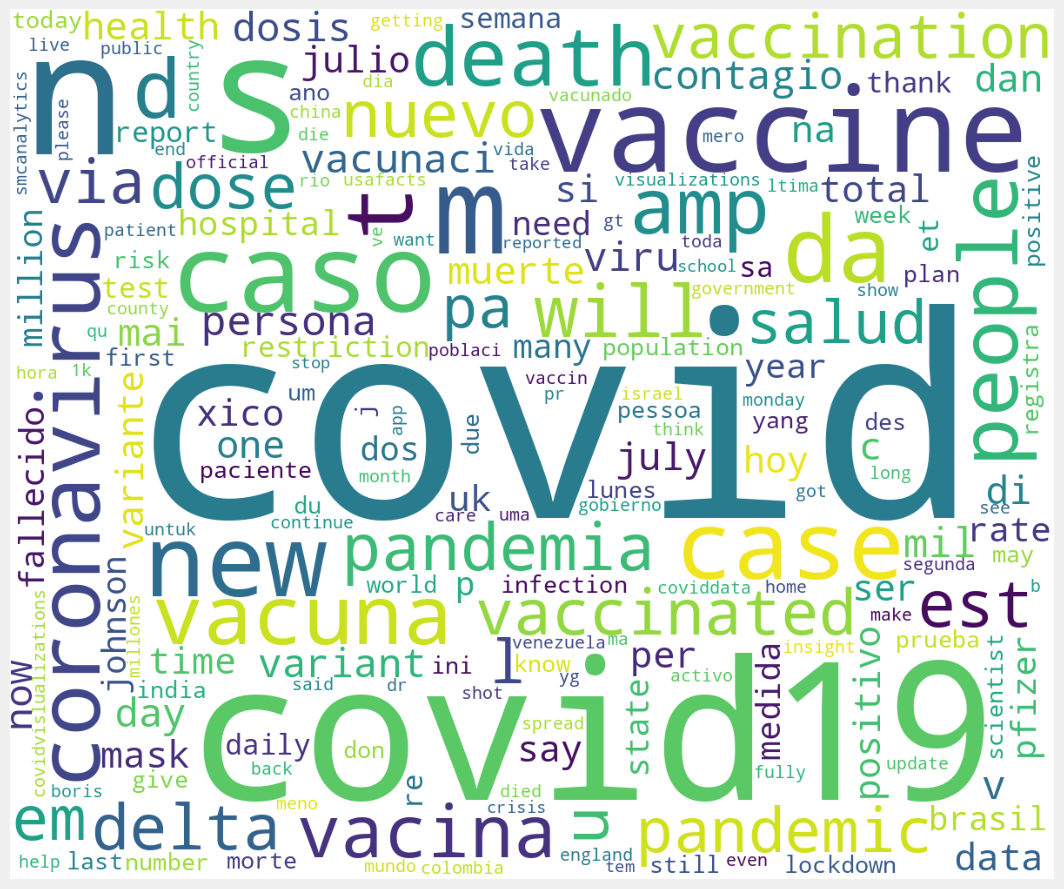

In [ ]:
#Wordcloud

from wordcloud import WordCloud, STOPWORDS
bigstring = tweets_df['processed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)